# Unsupervised Learning

Generating the Dataset for 5  responsible columns for Driver Behavior

In [40]:
import random
import csv
import numpy as np

# Open CSV file for writing
with open('cluster_dataset.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header row
    writer.writerow(['Speed (km/h)', 'Acceleration (m/s²)', 'Braking intensity (%)',
                     'Cornering speed (km/h)', 'Driver Behavior rating'])

    # Generate 10000 rows of data
    for _ in range(10000):
        # Set the driver behavior rating
        behavior_rating = random.randint(1, 10)

        # Generate features based on driver behavior
        speed = random.randint(40, 100) + behavior_rating * 3
        acceleration = random.uniform(0, 5) + behavior_rating * 0.5
        braking_intensity = random.randint(60, 100) - behavior_rating * 2
        cornering_speed = random.randint(14, 30) + behavior_rating
        
        # Introduce variability within clusters
        speed += random.uniform(-10, 10)
        acceleration += random.uniform(-1, 1)
        braking_intensity += random.uniform(-10, 10)
        cornering_speed += random.uniform(-5, 5)
        
        # Write row to CSV
        writer.writerow(["{:.2f}".format(speed), "{:.2f}".format(acceleration), "{:.2f}".format(braking_intensity), "{:.2f}".format(cornering_speed), "{:.2f}".format(behavior_rating)])



## KMeans

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_csv('cluster_dataset.csv',encoding='ISO-8859-1')
 
X = data.drop(columns=['Driver Behavior rating'],axis=1)
X.sample(5)

,Speed (km/h),Acceleration (m/s²),Braking intensity (%),Cornering speed (km/h)
513,88.44,5.22,70.57,24.26
4239,73.51,3.57,92.54,34.17
5534,99.57,8.80,70.28,32.30
5951,111.25,6.45,50.95,37.12
2015,103.70,8.93,38.30,34.01


In [43]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

In [44]:
predicted_clusters = kmeans.predict(X)

In [45]:
predicted_clusters

array([3, 1, 7, ..., 6, 3, 3])

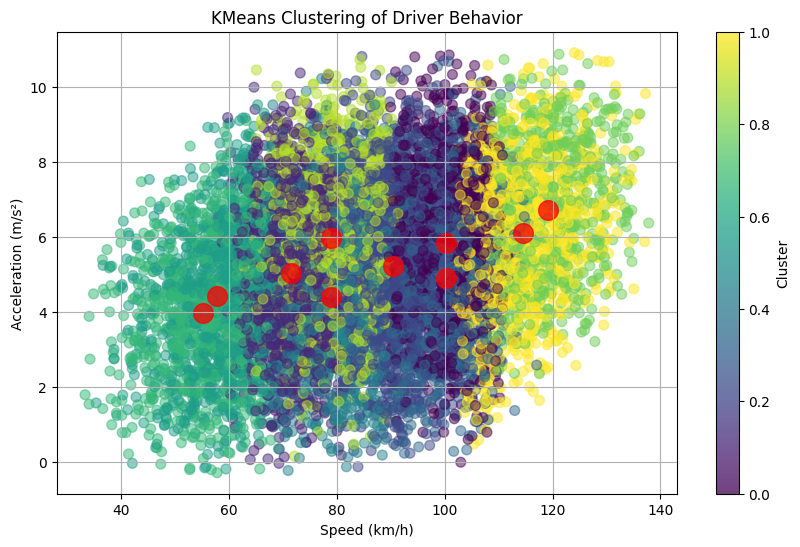

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Speed (km/h)'], X['Acceleration (m/s²)'], c=predicted_clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75)

plt.xlabel('Speed (km/h)')
plt.ylabel('Acceleration (m/s²)')
plt.title('KMeans Clustering of Driver Behavior')

plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

- The Silhouette Score is a metric used to quantifies how similar an object is to its own cluster compared to other clusters.
- The Silhouette score ranges from -1 to 1. +1 perfectly matched and -1 wrongly matched.

- Inertia is the sum of squared distances of samples to their closest cluster center.
- Lower Inertia values generally indicate better-defined clusters.

In [50]:
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, predicted_clusters)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette_avg)

Inertia: 1202768.285318239
Silhouette Score: 0.24682391569329834


In [48]:
custom_output = kmeans.predict([[110, 6, 77, 36]])
print("Custom output:", custom_output)

Custom output: [9]
